<a href="https://colab.research.google.com/github/MFerrugem/PDI_UFPEL/blob/main/aula_06_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

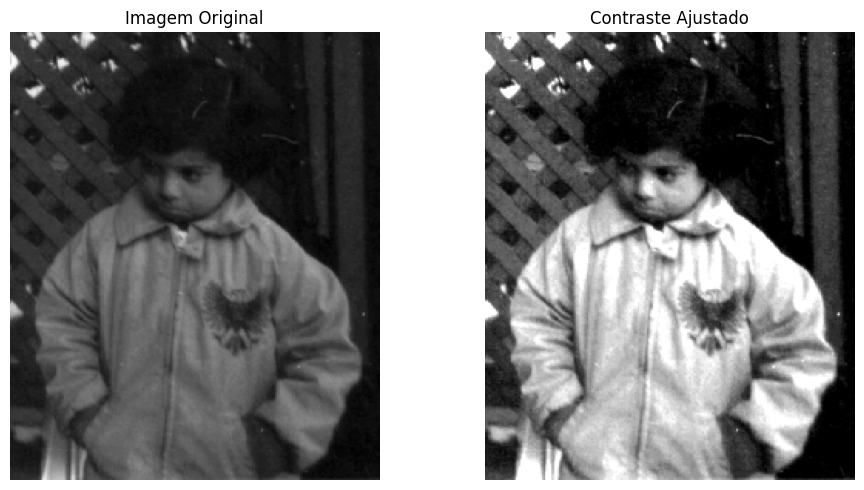

In [1]:
# Contrast stretching

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_float
from skimage.exposure import rescale_intensity

# Ler a imagem
I = io.imread('pout.tif')

# Converter a imagem para float para evitar erros de tipo
I = img_as_float(I)

# Calcular os limites de stretch usando percentis (equivalente ao stretchlim do Matlab)
p_low, p_high = np.percentile(I, (5, 95))

# Aplicar o ajuste de contraste (rescale_intensity é mais robusto e geral)
Ics = rescale_intensity(I, in_range=(p_low, p_high))

# ou, para uma equivalência mais direta (mas menos robusta em alguns casos):
# from skimage import exposure
# Ics = exposure.adjust_contrast(I, gain=(p_high - p_low)) #não funciona exatamente igual ao stretchlim.

# Criar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar a imagem original
axes[0].imshow(I, cmap='gray') # cmap='gray' para imagens em tons de cinza
axes[0].set_title('Imagem Original')

# Mostrar a imagem com contraste ajustado
axes[1].imshow(Ics, cmap='gray')
axes[1].set_title('Contraste Ajustado')

# Remover os eixos dos subplots para melhor visualização
for ax in axes:
    ax.axis('off')

# Mostrar o plot
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()




O que está acontecendo?

1. A imagem 'pout.tif' é lida.
2. Os limites de intensidade de pixel são calculados usando os percentis 5% e 95%.
3. O contraste da imagem é esticado, mapeando os valores entre os percentis calculados para a faixa completa de intensidades (0 a 1, pois convertemos para float).
4. As imagens original e com contraste ajustado são exibidas lado a lado."